In [1]:
!pip list

Package                      Version
---------------------------- --------------
absl-py                      2.2.1
anyio                        4.9.0
appnope                      0.1.4
argon2-cffi                  23.1.0
argon2-cffi-bindings         21.2.0
arrow                        1.3.0
asttokens                    3.0.0
astunparse                   1.6.3
async-lru                    2.0.5
attrs                        25.3.0
babel                        2.17.0
beautifulsoup4               4.13.3
bleach                       6.2.0
certifi                      2025.1.31
cffi                         1.17.1
chardet                      3.0.4
charset-normalizer           3.4.1
click                        8.1.8
comm                         0.2.2
contourpy                    1.3.1
cycler                       0.12.1
debugpy                      1.8.13
decorator                    5.2.1
deep-translator              1.11.4
defusedxml                   0.7.1
exceptiongroup               1.

In [2]:
pip install numpy pandas matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

## Import Dataset

In [4]:
clean_df=pd.read_csv('clean_resume_data.csv')

In [5]:
clean_df.head()

,ID,Category,Feature
0,16852973,HR,hr administrator marketing associate hr admini...
1,22323967,HR,hr specialist hr operations summary media prof...
2,33176873,HR,hr director summary years experience recruitin...
3,27018550,HR,hr specialist summary dedicated driven dynamic...
4,17812897,HR,hr manager skill highlights hr skills hr depar...


In [6]:
clean_df.shape

(2484, 3)

## Exploring the dataset

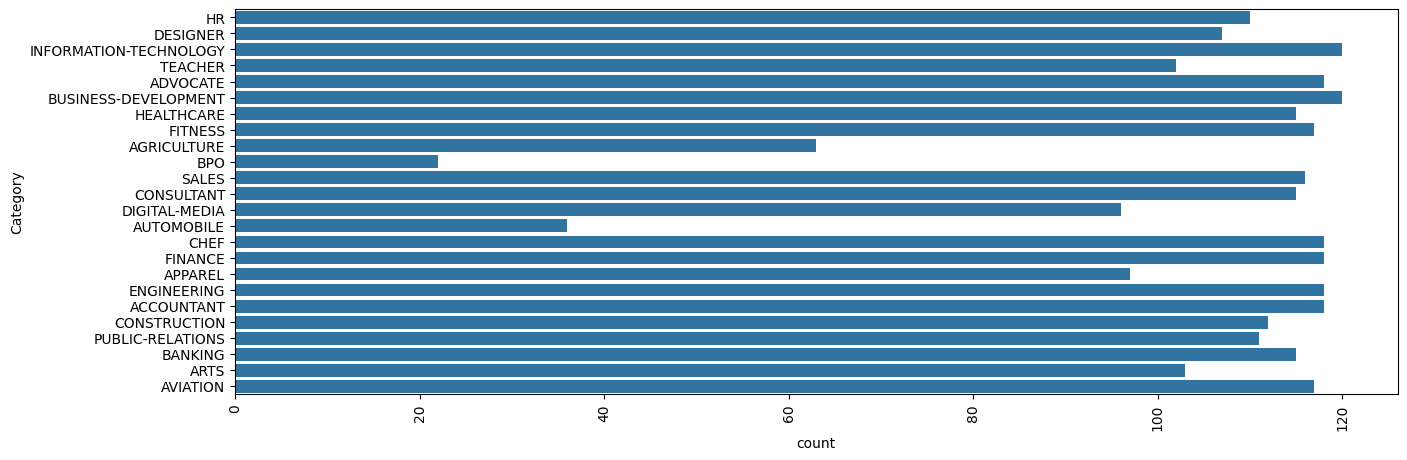

In [7]:
plt.figure(figsize=(15,5))
sns.countplot(clean_df['Category'])
plt.xticks(rotation=90)
plt.show()

In [8]:
clean_df['Category'].value_counts()

Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
FINANCE                   118
ADVOCATE                  118
ACCOUNTANT                118
ENGINEERING               118
CHEF                      118
AVIATION                  117
FITNESS                   117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64

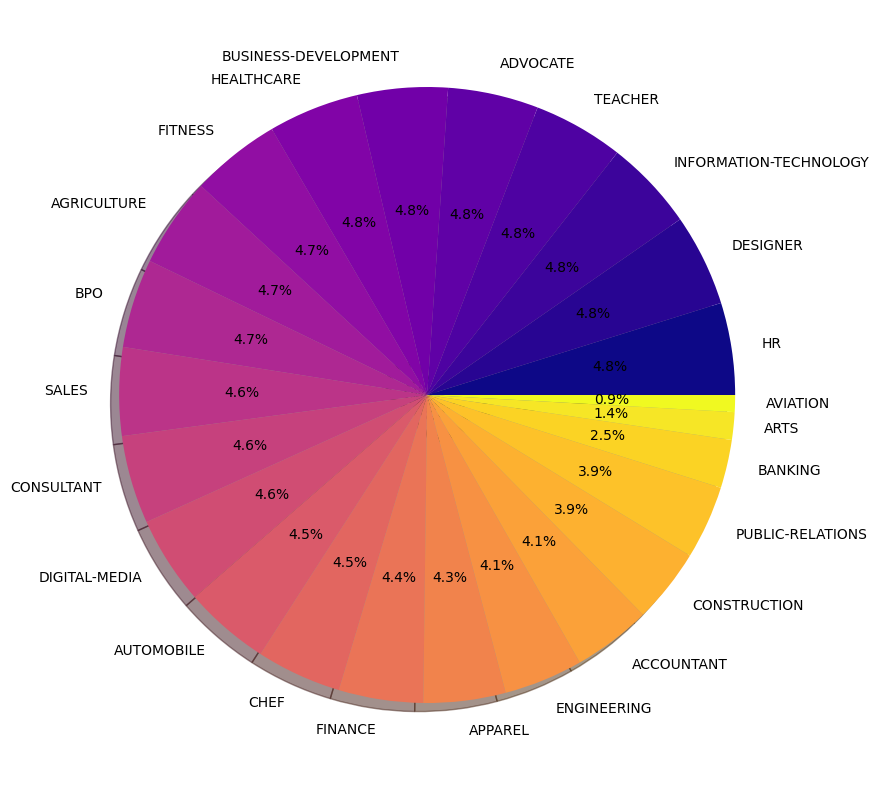

In [9]:
counts=clean_df['Category'].value_counts()
labels=clean_df['Category'].unique()
plt.figure(figsize=(15,10))
colors = plt.cm.plasma(np.linspace(0, 1, len(counts)))  

plt.pie(counts, labels=labels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

## Balancing Dataset

In [10]:
from sklearn.utils import resample

max_count=clean_df['Category'].value_counts().max()

balanced_data=[]
for category in clean_df['Category'].unique():
    category_data=clean_df[clean_df['Category']==category]
    if len(category_data) < max_count:        
        # Perform oversampling for categories with fewer samples
        balanced_category_data = resample(category_data, replace=True, n_samples=max_count, random_state=42)
    else:
        # Perform undersampling for categories with more samples
        balanced_category_data = resample(category_data, replace=False, n_samples=max_count, random_state=42)
    balanced_data.append(balanced_category_data)

balanced_df=pd.concat(balanced_data)

In [11]:
balanced_df.dropna(inplace=True)

In [12]:
balanced_df.head()

,ID,Category,Feature
102,10399912,HR,hr personnel assistant summary u citizen autho...
51,39650734,HR,hr assistant summary hard worker dedicated det...
92,23510685,HR,global hr manager summary global hr profession...
14,27490876,HR,hr coordinator summary applicant screening bac...
106,24402267,HR,designation hr assistant professional summary ...


## Spliting Dataset

In [13]:
from sklearn.model_selection import train_test_split
X = balanced_df['Feature']
y = balanced_df['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Encoding TFIDF

In [14]:
tfidf_vectorizer=TfidfVectorizer()
X_train_tfidf=tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf=tfidf_vectorizer.transform(X_test)

## RandomForest Classifier

In [15]:
from sklearn.metrics import classification_report

rf_classifier=RandomForestClassifier()
rf_classifier.fit(X_train_tfidf,y_train)
y_pred = rf_classifier.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test,y_pred))

Accuracy: 0.8541666666666666
                        precision    recall  f1-score   support

            ACCOUNTANT       0.80      0.95      0.87        21
              ADVOCATE       1.00      0.76      0.86        29
           AGRICULTURE       0.94      0.74      0.83        23
               APPAREL       0.90      0.86      0.88        21
                  ARTS       0.88      0.68      0.77        22
            AUTOMOBILE       1.00      1.00      1.00        19
              AVIATION       0.94      1.00      0.97        30
               BANKING       1.00      0.78      0.88        23
                   BPO       1.00      1.00      1.00        15
  BUSINESS-DEVELOPMENT       0.61      0.78      0.68        18
                  CHEF       0.96      0.96      0.96        28
          CONSTRUCTION       0.89      1.00      0.94        25
            CONSULTANT       0.95      0.58      0.72        31
              DESIGNER       0.92      0.86      0.89        28
         D

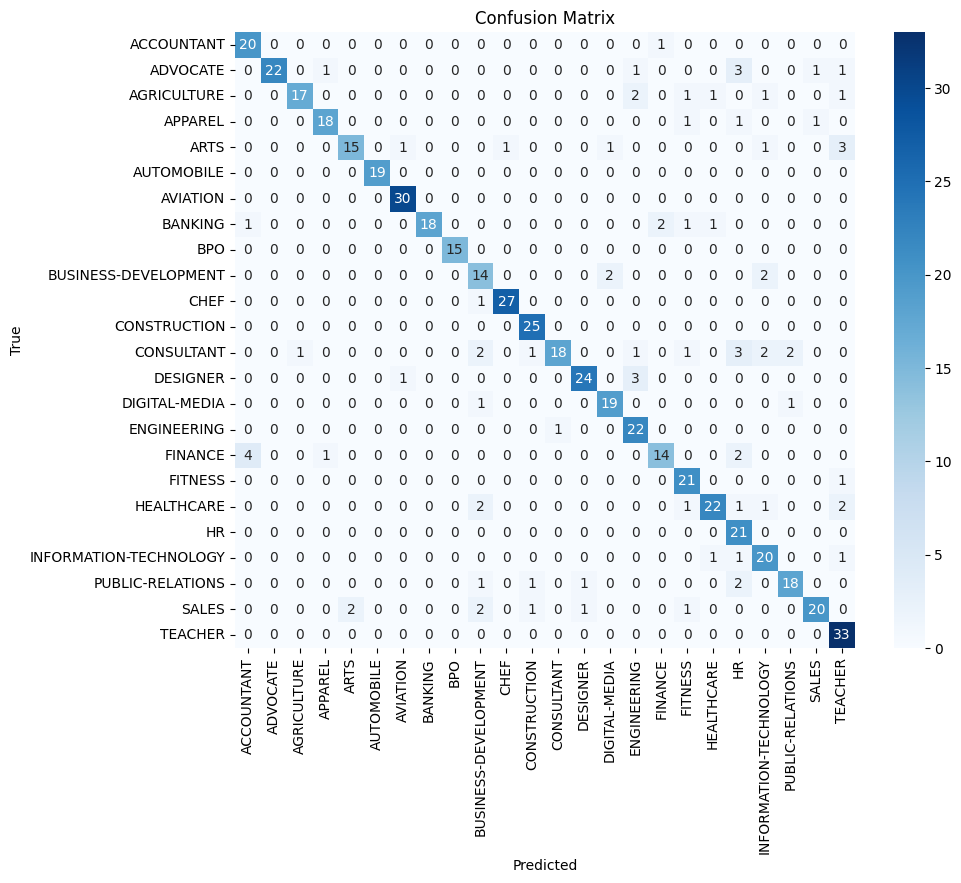

In [16]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Usage

In [17]:
import re
def cleanResume(txt):
    cleanText = re.sub('http\S+\s', ' ', txt)
    cleanText = re.sub('RT|cc', ' ', cleanText)
    cleanText = re.sub('#\S+\s', ' ', cleanText)
    cleanText = re.sub('@\S+', '  ', cleanText)  
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText) 
    cleanText = re.sub('\s+', ' ', cleanText)
    return cleanText


def predict_category(resume_text):
    resume_text= cleanResume(resume_text)
    resume_tfidf = tfidf_vectorizer.transform([resume_text])
    predicted_category = rf_classifier.predict(resume_tfidf)[0]
    return predicted_category

In [18]:

# Example Usage
resume_file = """Objective:
A creative and detail-oriented Designer with a passion for visual communication and brand identity seeking opportunities to leverage design skills in a dynamic and collaborative environment.

Education:
- Bachelor of Fine Arts in Graphic Design, XYZ College, GPA: 3.7/4.0
- Diploma in Web Design, ABC Institute, GPA: 3.9/4.0

Skills:
- Proficient in Adobe Creative Suite (Photoshop, Illustrator, InDesign)
- Strong understanding of typography, layout, and color theory
- Experience in both print and digital design
- Ability to conceptualize and execute design projects from concept to completion
- Excellent attention to detail and time management skills

Experience:
Graphic Designer | XYZ Design Studio
- Created visually appealing graphics for various marketing materials, including brochures, flyers, and social media posts
- Collaborated with clients to understand their design needs and deliver creative solutions that align with their brand identity
- Worked closely with the marketing team to ensure consistency in brand messaging across all platforms

Freelance Designer
- Designed logos, branding materials, and website layouts for small businesses and startups
- Managed multiple projects simultaneously while meeting tight deadlines and maintaining quality standards
- Established and maintained strong client relationships through clear communication and exceptional service

Projects:
- Rebranding Campaign for XYZ Company: Led a team to redesign the company's logo, website, and marketing collateral, resulting in a 30% increase in brand recognition
- Packaging Design for ABC Product Launch: Developed eye-catching packaging designs for a new product line, contributing to a successful launch and positive customer feedback

Certifications:
- Adobe Certified Expert (ACE) in Adobe Illustrator
- Responsive Web Design Certification from Udemy

Languages:
- English (Native)
- Spanish (Intermediate)
"""
predicted_category = predict_category(resume_file)
print("Predicted Category:", predicted_category)

Predicted Category: DESIGNER


## Data Augmentation

In [19]:
pip install tensorflow numpy pandas nltk scikit-learn googletrans==4.0.0-rc1


Note: you may need to restart the kernel to use updated packages.


In [20]:
import nltk
from nltk.corpus import wordnet
import random

nltk.download('wordnet')
nltk.download('omw-1.4')

def synonym_replace(text, n=3):
    words = text.split()
    for _ in range(n):
        if not words:
            return text
        word_idx = random.randint(0, len(words) - 1)
        synonyms = wordnet.synsets(words[word_idx])
        if synonyms:
            lemmas = [lemma.name().replace("_", " ") for syn in synonyms for lemma in syn.lemmas()]
            lemmas = list(set(lemmas))  # Remove duplicates
            if len(lemmas) > 1:
                words[word_idx] = random.choice(lemmas)
    return " ".join(words)

balanced_df['augmented_feature'] = balanced_df['Feature'].apply(synonym_replace)


[nltk_data] Downloading package wordnet to /Users/vijay/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/vijay/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [21]:
balanced_df['augmented_feature'].head()

102    hr personnel assistant summary u citizen autho...
51     hr assistant summary hard worker dedicated det...
92     global hr manager summary global hr profession...
14     hr coordinator summary applicant screening bac...
106    designation hr assistant professional summary ...
Name: augmented_feature, dtype: object

In [22]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences

# # Tokenization
# tokenizer = Tokenizer(num_words=5000, lower=True, oov_token="<OOV>")
# tokenizer.fit_on_texts(balanced_df['augmented_feature'])

# X = tokenizer.texts_to_sequences(balanced_df['augmented_feature'])
# X = pad_sequences(X, maxlen=100, padding='post')

# # Convert categories to numerical labels
# y = pd.get_dummies(balanced_df['Category']).values

In [23]:
# model = Sequential([
#     Embedding(input_dim=5000, output_dim=128, input_length=100),
#     SpatialDropout1D(0.2),
#     LSTM(100, dropout=0.2, recurrent_dropout=0.2),
#     Dense(len(y[0]), activation='softmax')
# ])

In [24]:
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [25]:
# model.fit(X, y, epochs=20, batch_size=32, validation_split=0.2)


In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenization
tokenizer = Tokenizer(num_words=5000, lower=True, oov_token="<OOV>")
tokenizer.fit_on_texts(balanced_df['augmented_feature'])

X = tokenizer.texts_to_sequences(balanced_df['augmented_feature'])
X = pad_sequences(X, maxlen=100, padding='post')

# Convert categories to numerical labels
y = pd.get_dummies(balanced_df['Category']).values

# Model with adjustments
model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=100),
    SpatialDropout1D(0.2),
    Bidirectional(LSTM(100, dropout=0.2, recurrent_dropout=0.2, return_sequences=True)),
    Bidirectional(LSTM(100, dropout=0.2, recurrent_dropout=0.2)),
    Dropout(0.2),
    Dense(len(y[0]), activation='softmax')
])

# Compile model
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, min_delta=0.001)

# Train model
model.fit(X, y, epochs=20, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/20


/Users/vijay/myenv/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


72/72 ━━━━━━━━━━━━━━━━━━━━ 9s 93ms/step - accuracy: 0.0607 - loss: 3.1003 - val_accuracy: 0.0000e+00 - val_loss: 5.6369
Epoch 2/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - accuracy: 0.1935 - loss: 2.6672 - val_accuracy: 0.0000e+00 - val_loss: 5.9388
Epoch 3/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step - accuracy: 0.5233 - loss: 1.6859 - val_accuracy: 0.0000e+00 - val_loss: 7.3125
Epoch 4/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - accuracy: 0.6928 - loss: 1.0567 - val_accuracy: 0.0017 - val_loss: 7.9017
Epoch 5/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 7s 103ms/step - accuracy: 0.8282 - loss: 0.6536 - val_accuracy: 0.0191 - val_loss: 8.5077
Epoch 6/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 8s 118ms/step - accuracy: 0.8899 - loss: 0.4214 - val_accuracy: 0.0330 - val_loss: 8.1504


## Other Models

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train_tfidf)
X_test_scaled = scaler.transform(X_test_tfidf)

# Train RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=42)
rf_classifier.fit(X_train_scaled, y_train)
y_pred_rf = rf_classifier.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("RandomForest Accuracy:", accuracy_rf)
print(classification_report(y_test, y_pred_rf))

RandomForest Accuracy: 0.8385416666666666
                        precision    recall  f1-score   support

            ACCOUNTANT       0.77      0.95      0.85        21
              ADVOCATE       1.00      0.79      0.88        29
           AGRICULTURE       0.95      0.78      0.86        23
               APPAREL       0.90      0.86      0.88        21
                  ARTS       1.00      0.64      0.78        22
            AUTOMOBILE       0.95      1.00      0.97        19
              AVIATION       0.88      1.00      0.94        30
               BANKING       1.00      0.74      0.85        23
                   BPO       1.00      1.00      1.00        15
  BUSINESS-DEVELOPMENT       0.45      0.56      0.50        18
                  CHEF       0.87      0.96      0.92        28
          CONSTRUCTION       0.93      1.00      0.96        25
            CONSULTANT       1.00      0.61      0.76        31
              DESIGNER       0.92      0.79      0.85        

In [28]:
!pip install imbalanced-learn


In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier

param_grid = {'estimator__n_neighbors': [3, 5, 7, 9], 'estimator__weights': ['uniform', 'distance'], 'estimator__metric': ['euclidean', 'manhattan']}
grid_search = GridSearchCV(OneVsRestClassifier(KNeighborsClassifier()), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)
best_knn = grid_search.best_estimator_

# Train optimized KNeighborsClassifier
best_knn.fit(X_train_scaled, y_train)
y_pred_knn = best_knn.predict(X_test_scaled)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Optimized KNeighbors Accuracy:", accuracy_knn)
print(classification_report(y_test, y_pred_knn))

Optimized KNeighbors Accuracy: 0.6145833333333334
                        precision    recall  f1-score   support

            ACCOUNTANT       1.00      0.76      0.86        21
              ADVOCATE       1.00      0.55      0.71        29
           AGRICULTURE       0.94      0.65      0.77        23
               APPAREL       1.00      0.76      0.86        21
                  ARTS       1.00      0.59      0.74        22
            AUTOMOBILE       1.00      1.00      1.00        19
              AVIATION       1.00      0.60      0.75        30
               BANKING       1.00      0.61      0.76        23
                   BPO       1.00      1.00      1.00        15
  BUSINESS-DEVELOPMENT       0.00      0.00      0.00        18
                  CHEF       0.11      1.00      0.20        28
          CONSTRUCTION       1.00      0.76      0.86        25
            CONSULTANT       1.00      0.52      0.68        31
              DESIGNER       1.00      0.50      0.67

/Users/vijay/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/vijay/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/vijay/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import MaxAbsScaler
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

# Apply Dimensionality Reduction with more components
svd = TruncatedSVD(n_components=150)  # Increase feature selection

# Resample dataset to balance classes
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_tfidf, y_train)

# Scale Data using MaxAbsScaler (better for sparse data)
scaler = MaxAbsScaler()
X_train_scaled = scaler.fit_transform(X_train_bal)
X_test_scaled = scaler.transform(X_test_tfidf)

# Define KNN Model Pipeline
knn_pipeline = Pipeline([
    ('svd', svd),  # Reduce features
    ('knn', OneVsRestClassifier(KNeighborsClassifier()))
])

# Define optimized hyperparameter grid
param_dist = {
    'knn__estimator__n_neighbors': [3, 5, 7, 9, 11, 15, 21],  
    'knn__estimator__weights': ['uniform', 'distance'],  
    'knn__estimator__metric': ['cosine', 'minkowski'],  
    'knn__estimator__p': [1, 1.5, 2]  # Minkowski parameter (1=Manhattan, 2=Euclidean)
}

# Optimize KNN with more iterations
random_search = RandomizedSearchCV(
    knn_pipeline, 
    param_distributions=param_dist, 
    n_iter=20,  # More iterations
    cv=3,  
    scoring='accuracy',  
    n_jobs=-1,  
    random_state=42
)

# Train model
random_search.fit(X_train_scaled, y_train_bal)
best_knn = random_search.best_estimator_

# Test model
y_pred_knn = best_knn.predict(X_test_scaled)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print("Final Optimized KNeighbors Accuracy:", accuracy_knn)
print(classification_report(y_test, y_pred_knn))


Final Optimized KNeighbors Accuracy: 0.7864583333333334
                        precision    recall  f1-score   support

            ACCOUNTANT       0.74      0.95      0.83        21
              ADVOCATE       0.83      0.66      0.73        29
           AGRICULTURE       0.89      0.74      0.81        23
               APPAREL       0.89      0.81      0.85        21
                  ARTS       0.93      0.59      0.72        22
            AUTOMOBILE       0.90      1.00      0.95        19
              AVIATION       0.82      0.77      0.79        30
               BANKING       0.84      0.70      0.76        23
                   BPO       0.94      1.00      0.97        15
  BUSINESS-DEVELOPMENT       0.42      0.72      0.53        18
                  CHEF       0.90      0.96      0.93        28
          CONSTRUCTION       0.88      0.88      0.88        25
            CONSULTANT       0.89      0.52      0.65        31
              DESIGNER       0.89      0.86    

In [31]:
!pip install xgboost

In [32]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import MaxAbsScaler
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

# Resample dataset to balance classes
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_tfidf, y_train)

# Scale Data
scaler = MaxAbsScaler()
X_train_scaled = scaler.fit_transform(X_train_bal)
X_test_scaled = scaler.transform(X_test_tfidf)

# Reduce dimensions (for KNN & XGBoost)
svd = TruncatedSVD(n_components=150)

### 🔹 1️⃣ Define KNN Model
knn_pipeline = Pipeline([
    ('svd', svd),
    ('knn', OneVsRestClassifier(KNeighborsClassifier(n_neighbors=7, metric='minkowski', p=1.5)))
])

### 🔹 2️⃣ Define Random Forest Model
rf_model = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=42, n_jobs=-1)

### 🔹 3️⃣ Define XGBoost Model
xgb_model = XGBClassifier(n_estimators=200, max_depth=10, learning_rate=0.1, random_state=42, n_jobs=-1)

# Create Voting Classifier (Soft Voting)
ensemble = VotingClassifier(
    estimators=[
        ('knn', knn_pipeline),
        ('rf', rf_model),
        ('xgb', xgb_model)
    ],
    voting='soft'  # 'soft' allows probability-based averaging (better performance)
)

# Train Ensemble Model
ensemble.fit(X_train_scaled, y_train_bal)

# Evaluate Ensemble Model
y_pred_ensemble = ensemble.predict(X_test_scaled)
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)

print(f"✅ Ensemble Model Accuracy: {accuracy_ensemble:.4f}")
print(classification_report(y_test, y_pred_ensemble))


✅ Ensemble Model Accuracy: 0.8889
                        precision    recall  f1-score   support

            ACCOUNTANT       0.91      1.00      0.95        21
              ADVOCATE       1.00      0.90      0.95        29
           AGRICULTURE       0.95      0.87      0.91        23
               APPAREL       1.00      0.81      0.89        21
                  ARTS       0.88      0.68      0.77        22
            AUTOMOBILE       1.00      1.00      1.00        19
              AVIATION       0.91      0.97      0.94        30
               BANKING       1.00      0.70      0.82        23
                   BPO       1.00      1.00      1.00        15
  BUSINESS-DEVELOPMENT       0.70      0.78      0.74        18
                  CHEF       0.97      1.00      0.98        28
          CONSTRUCTION       0.89      1.00      0.94        25
            CONSULTANT       0.85      0.71      0.77        31
              DESIGNER       0.93      0.96      0.95        28
     

In [33]:
import re

# Function to clean resume text
def clean_resume(txt):
    clean_text = re.sub(r'http\S+\s', ' ', txt)
    clean_text = re.sub(r'RT|cc', ' ', clean_text)
    clean_text = re.sub(r'#\S+\s', ' ', clean_text)
    clean_text = re.sub(r'@\S+', ' ', clean_text)  
    clean_text = re.sub(r'[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', clean_text)
    clean_text = re.sub(r'[^\x00-\x7f]', ' ', clean_text) 
    clean_text = re.sub(r'\s+', ' ', clean_text)
    return clean_text

# Function to predict category using the latest ensemble model
def predict_category(resume_text):
    resume_text = clean_resume(resume_text)  # Clean the input text
    resume_tfidf = tfidf_vectorizer.transform([resume_text])  # Convert to TF-IDF features
    resume_scaled = scaler.transform(resume_tfidf)  # Scale features
    
    predicted_category = ensemble.predict(resume_scaled)[0]  # Predict using the ensemble model
    return predicted_category


In [34]:

# Example Usage
resume_file = """Objective:
A creative and detail-oriented Designer with a passion for visual communication and brand identity seeking opportunities to leverage design skills in a dynamic and collaborative environment.

Education:
- Bachelor of Fine Arts in Graphic Design, XYZ College, GPA: 3.7/4.0
- Diploma in Web Design, ABC Institute, GPA: 3.9/4.0

Skills:
- Proficient in Adobe Creative Suite (Photoshop, Illustrator, InDesign)
- Strong understanding of typography, layout, and color theory
- Experience in both print and digital design
- Ability to conceptualize and execute design projects from concept to completion
- Excellent attention to detail and time management skills

Experience:
Graphic Designer | XYZ Design Studio
- Created visually appealing graphics for various marketing materials, including brochures, flyers, and social media posts
- Collaborated with clients to understand their design needs and deliver creative solutions that align with their brand identity
- Worked closely with the marketing team to ensure consistency in brand messaging across all platforms

Freelance Designer
- Designed logos, branding materials, and website layouts for small businesses and startups
- Managed multiple projects simultaneously while meeting tight deadlines and maintaining quality standards
- Established and maintained strong client relationships through clear communication and exceptional service

Projects:
- Rebranding Campaign for XYZ Company: Led a team to redesign the company's logo, website, and marketing collateral, resulting in a 30% increase in brand recognition
- Packaging Design for ABC Product Launch: Developed eye-catching packaging designs for a new product line, contributing to a successful launch and positive customer feedback

Certifications:
- Adobe Certified Expert (ACE) in Adobe Illustrator
- Responsive Web Design Certification from Udemy

Languages:
- English (Native)
- Spanish (Intermediate)
"""
predicted_category = predict_category(resume_file)
print("Predicted Category:", predicted_category)

Predicted Category: DESIGNER
